# <center> پروژه ی اول <br> رگرسیون <center/>

## مرحله ی اول:
<h3> وارد کردن کتابخانه ها </h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

### خواندن اطلاعات

In [3]:
df = pd.read_csv('housePrice.csv' , index_col= False)
df = df.dropna()


df.tail()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


### data cleaning

در این بین تعداد داده های n/a هم پیدا می کنیم که مشخص می شود تنها در ستون مربوط به اددرس این طور است و چون به تعداد کمی است با `df.dropna` حذف می کنیم

در داده های Area چند داده هستد که فرمت مناسبی ندارند که می توان  توسط *regex* مناسب سازی می شوند اما چون داده پرت نیز محسوب می شوند ترجیح می شود که پاک شود.
در نهایت برای خوانا شدن برای کامپیوتر  داده ها تبدیل به یک آرایه np می شود


In [4]:
df = df.loc[df['Area'].str.contains(" ", case=False) == False]

df = df.dropna()

X = np.asanyarray(df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
Y = np.asanyarray(df['Price(USD)'])

X[:5,0]
len(Y)

3450

### داده هایی که بصورت `str`  یا  `True` و `False` بودند که برای آنالیز آن ها را بصورت 0 و 1 در می آوریم. 

In [5]:
Park_ncdr = preprocessing.LabelEncoder()
Park_ncdr.fit([True, False])
X[:,2] = Park_ncdr.transform(X[:,2])

Ware_ncdr = preprocessing.LabelEncoder()
Ware_ncdr.fit([True, False])
X[:,3] = Ware_ncdr.transform(X[:,3])

ele_ncdr = preprocessing.LabelEncoder()
ele_ncdr.fit([True, False])
X[:,4] = ele_ncdr.transform(X[:,4])

addr = df['Address'].values
addr = list(addr)
addr_ncdr = preprocessing.LabelEncoder()
addr_ncdr.fit(addr)
X[:,5] = addr_ncdr.transform(X[:,5])

X[:,0] = X[:,0].astype(int)

X[:,5]

array([156, 156, 117, ..., 115, 39, 115], dtype=object)

# پیدا کردن داده های پرت با z-score

In [6]:

def zscore_outlier(data):
    outliers = []
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    for y in data:
        z_score = (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [7]:
print("Datas Before: \n",X.shape)

for i in range((X.shape[1])):
    outlr_ = zscore_outlier(X[:,i])
    for j in range(len(outlr_)):
        if X[:,i][j] in outlr_:          
            X =  np.delete(arr = X, obj = i, axis = 0 )
            Y =  np.delete(arr = Y, obj = i, axis = 0 )
            continue
    
print("Datas After: \n",X.shape)

Datas Before: 
 (3450, 6)
Datas After: 
 (3430, 6)


## استاندارد سازی داده 

In [8]:
X = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))

print("the X is: \n", X[:5])
print("the Y is: \n", Y)

the X is: 
 [[0.03670745 0.2        1.         1.         1.         0.81675393]
 [0.03337041 0.2        1.         1.         1.         0.81675393]
 [0.05450501 0.4        1.         1.         1.         0.61256545]
 [0.07675195 0.4        1.         1.         1.         0.51832461]
 [0.08342603 0.4        1.         1.         1.         0.70680628]]
the Y is: 
 [ 61666.67  61666.67  18333.33 ...  12166.67 186666.67  12000.  ]


## رسم داده ها 
برای درک میزان ارتباط خطی بودن داده ها را بر حسب Price بصورت نقطه ای (scatter) رسم کنیم

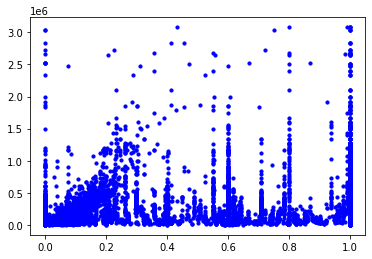

In [9]:
for i in range(X.shape[1]):
    plt.scatter(X[:,i], Y[:] , s = 10 ,color = 'blue')
plt.show()

# شروع یادگیری


## جدا سازی داده ها

In [10]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

### ابتدا با رگرسیون خطی ساده


In [11]:
clf = linear_model.LinearRegression()

clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)

print('coef: \n', clf.coef_)
print('intercept: \n', clf.intercept_)
print('Accurecy: \n', clf.score(x_test,y_test))
print("R2-score: %.2f" % r2_score(y_test, y_predict ) )

coef: 
 [2270117.65367304  208600.01023351   -4708.71880778   28889.47214405
   40953.38874965   13144.81358476]
intercept: 
 -162378.39179155882
Accurecy: 
 0.5616779954919666
R2-score: 0.56


# رسم نهایی داده ها و خط رگرسیون

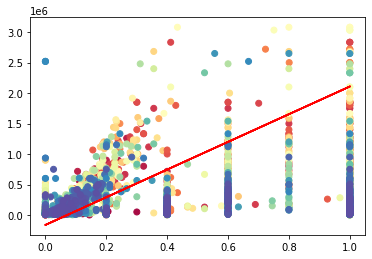

In [12]:
y_hat = clf.coef_[0]*x_train + clf.intercept_
colors = plt.cm.Spectral(np.linspace(0, 1, len(Y)))
plt.scatter(X[:,0], Y[:],  color= colors )
plt.scatter(X[:,1], Y[:],  color= colors )
plt.scatter(X[:,2], Y[:],  color= colors )
plt.scatter(X[:,3], Y[:],  color= colors)
plt.plot(x_train, y_hat, '-r')
plt.show()

# رگرسیون به روش polynomial

In [13]:


poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(x_train)

In [14]:


clp = linear_model.LinearRegression()

_y_train = clp.fit(train_x_poly, y_train)


# The coefficients
print ('Coefficients: ', clp.coef_)
print ('Intercept: ',clp.intercept_)

Coefficients:  [-1.87181007e-10  1.75017714e+06 -5.77023858e+05 -2.74303166e+03
  1.03077388e+04  3.41492500e+04  1.94671095e+04 -2.25039594e+06
  3.72930777e+06 -1.70261333e+06 -1.74347574e+05  2.05121286e+06
  1.30765281e+06  9.00992243e+04  1.65479396e+05  1.98177837e+05
 -2.57384558e+05 -3.02709057e+05 -2.74303166e+03  2.95377971e+04
  6.24485504e+03  2.93556158e+04  1.03077388e+04 -4.65221167e+04
 -1.00714589e+05  3.41492500e+04 -7.25808596e+04  1.26449015e+05]
Intercept:  35300.15947460677


In [15]:
x_test_poly = poly.fit_transform(x_test)

y_predict_p = clp.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict_p - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict_p - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_predict_p ) )


Mean absolute error: 82799.13
Residual sum of squares (MSE): 24072765883.86
R2-score: 0.67


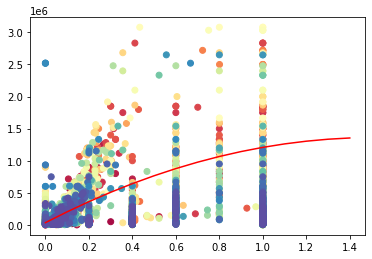

In [27]:
XX = np.arange(0.0, 1.5, 0.1)
yy = clp.intercept_+ clp.coef_[1]*XX + clp.coef_[2]*np.power(XX, 2)


plt.scatter(X[:,0], Y[:],  color= colors )
plt.scatter(X[:,1], Y[:],  color= colors )
plt.scatter(X[:,2], Y[:],  color= colors )
plt.scatter(X[:,3], Y[:],  color= colors)
plt.plot(XX, yy, '-r' )
plt.show()